In [6]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [8]:
import glob
import json
import pprint
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
def load_dataset(path:str) :
    with open( path, "r",encoding='utf8') as fr:
        docs = json.load(fr)

    return docs

In [10]:
def check_doc(doc:dict):
    
    data = doc["dataset"]
    q = doc["question"]
    a = doc["answers"]
    pos = len(doc["positive_ctxs"])
    neg = len(doc["negative_ctxs"])
    h_neg = len(doc["hard_negative_ctxs"])
    
    print(f"Dataset: {data} | Q: {q} | A: {a}\npos:{pos} neg:{neg} hard neg:{h_neg}")

In [11]:
def stats_data(docs:list):
    poslist=[]
    neglist=[]
    hneglist=[]
    for i, doc in enumerate(docs):
        pos = len(doc["positive_ctxs"])
        neg = len(doc["negative_ctxs"])
        h_neg = len(doc["hard_negative_ctxs"])
        poslist.append(pos)
        neglist.append(neg)
        hneglist.append(h_neg)

    
    print("**** max ****")
    print("pos:", np.max(poslist))
    print("neg", np.max(neglist))
    print("hard_neg", np.max(hneglist))
    print("**** min ****")
    print("pos", np.min(poslist))
    print("neg",np.min(neglist))
    print("hard_neg",np.min(hneglist))
    print("**** mean ****")
    print("pos", np.mean(poslist))
    print("neg", np.mean(neglist))
    print("hard_neg", np.mean(hneglist))
    print("**** median ****")
    print("pos", np.median(poslist))
    print("neg", np.median(neglist))
    print("hard_neg", np.median(hneglist))

    return poslist, neglist, hneglist

In [12]:
def get_datatext(idx, doc_key):
    pprint.pprint(docs[idx][doc_key])

In [15]:
k = ['dt', 'q', 'a', 'p', 'n', 'hn']
dk = ['dataset', 'question', 'answers', 'positive_ctxs', 'negative_ctxs', 'hard_negative_ctxs']
doc_keys = dict(zip(k, dk))

#### 키값 내용

**dict_keys(['dataset', 'question', 'answers', 'positive_ctxs', 'negative_ctxs', 'hard_negative_ctxs'])**

* dataset : 데이터 셋 정보.위키 triviz, trec, squad.  
* question: 질문 문장 하나  
* answers: mrc 최종 결과. 이하 '답'이라 하겠음  
* positive_ctxs: 답이 포함되어 있고, bm25 상위 랭크에 걸리는 결과들  
* negative_ctxs: random or 다른 q의 positive. 검색 스코어 0  
* hard_negative_ctxs: 검색 스코어가 높은데 답은 없는 검색 결과  

In [14]:
data_path="./data/retriever/*train.json"

In [17]:
irdata_list = glob.glob(data_path)

irdata_list

['./data/retriever/nq-train.json',
 './data/retriever/trivia-train.json',
 './data/retriever/nq-adv-hn-train.json',
 './data/retriever/curatedtrec-train.json',
 './data/retriever/webq-train.json',
 './data/retriever/squad1-train.json']

# NQ Train

In [10]:
docs = load_dataset( irdata_list[0] )
print(len(docs))

58880


In [11]:
print(f"{docs[0].keys()}\n{len(docs)}")

dict_keys(['dataset', 'question', 'answers', 'positive_ctxs', 'negative_ctxs', 'hard_negative_ctxs'])
58880


title_score는 rank1 만 1 이고, 나머진 0. 뭘 기준으로 하는지 모르겠음. 
논문에서는 모든 passage에 제목을 [SEP] 토큰으로 이어붙였다고 함.

In [12]:
poslist, neglist, hneglist = stats_data(docs)

**** max ****
pos: 101
neg 50
hard_neg 100
**** min ****
pos 1
neg 50
hard_neg 0
**** mean ****
pos 8.471739130434782
neg 50.0
hard_neg 92.52826086956522
**** median ****
pos 4.0
neg 50.0
hard_neg 97.0


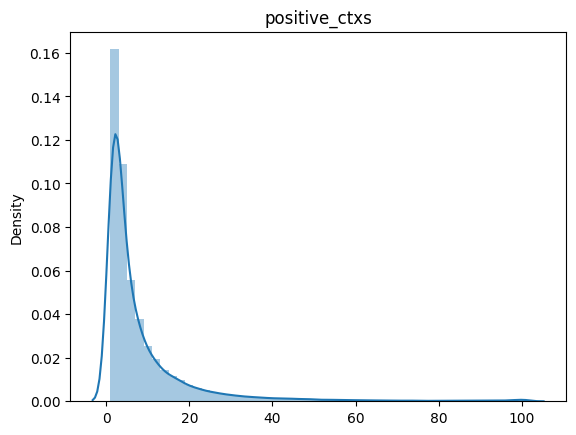

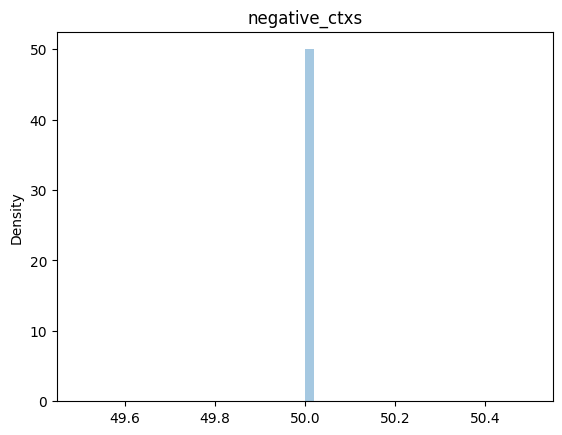

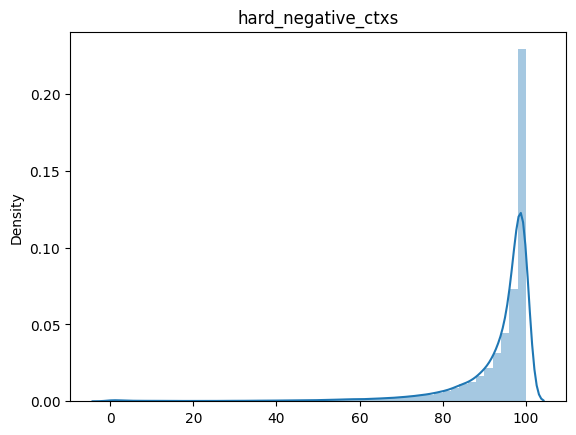

In [13]:
sns.distplot(np.array(poslist)).set(title='positive_ctxs')
plt.show()
sns.distplot(np.array(neglist)).set(title='negative_ctxs')
plt.show()
sns.distplot(np.array(hneglist)).set(title='hard_negative_ctxs')
plt.show()

# Trivia QA

In [18]:
docs = load_dataset( irdata_list[1] )
print(len(docs))

78785


In [50]:
poslist, neglist, hneglist = stats_data(docs)

**** max ****
pos: 100
neg 0
hard_neg 100
**** min ****
pos 0
neg 0
hard_neg 0
**** mean ****
pos 9.41087770514692
neg 0.0
hard_neg 90.58912229485308
**** median ****
pos 4.0
neg 0.0
hard_neg 96.0


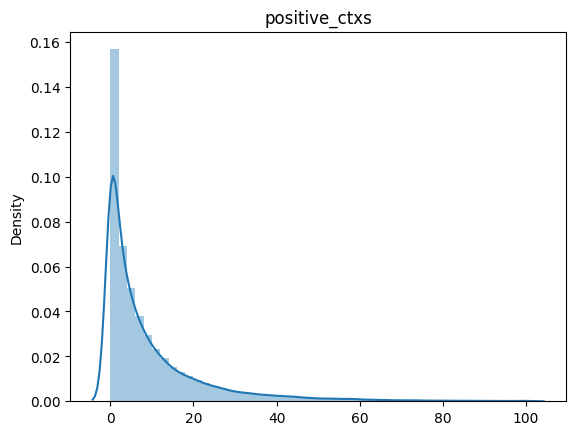

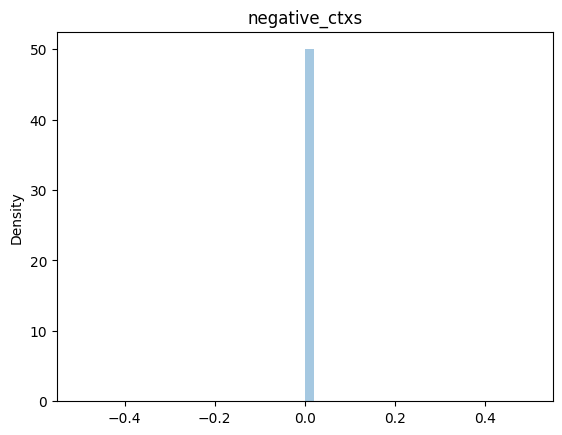

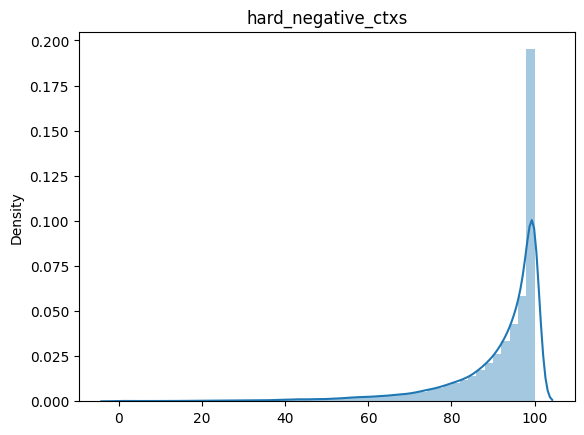

In [51]:
sns.distplot(np.array(poslist)).set(title='positive_ctxs')
plt.show()
sns.distplot(np.array(neglist)).set(title='negative_ctxs')
plt.show()
sns.distplot(np.array(hneglist)).set(title='hard_negative_ctxs')
plt.show()

# NQ hard negative?

몰까 이 데이터셋은

In [35]:
docs = load_dataset( irdata_list[2] )

In [38]:
print(len(docs))

69639


In [36]:
poslist, neglist, hneglist = stats_data(docs)

**** max ****
pos: 6
neg 0
hard_neg 30
**** min ****
pos 1
neg 0
hard_neg 0
**** mean ****
pos 4.4024612645213175
neg 0.0
hard_neg 29.964071856287426
**** median ****
pos 5.0
neg 0.0
hard_neg 30.0


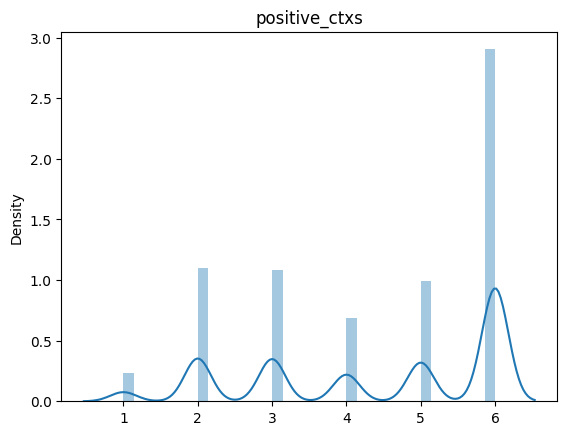

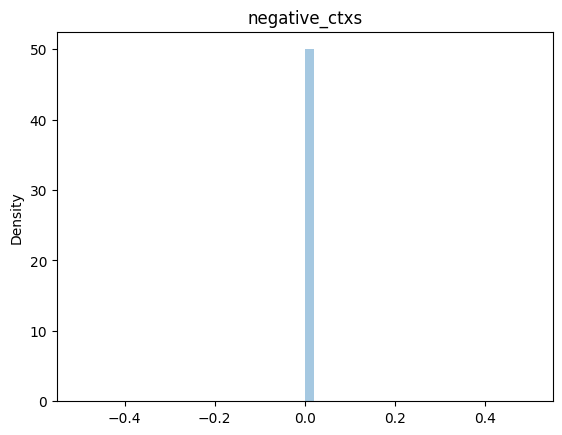

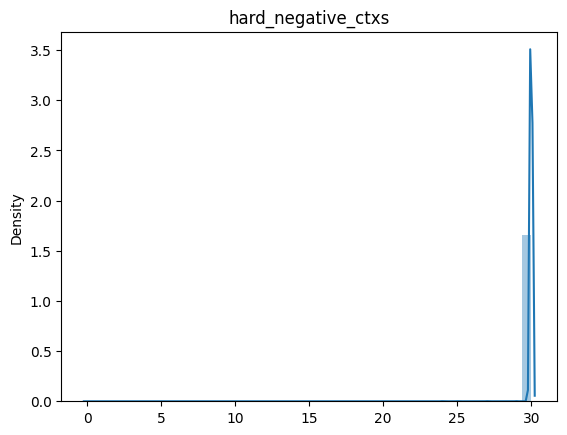

In [37]:
sns.distplot(np.array(poslist)).set(title='positive_ctxs')
plt.show()
sns.distplot(np.array(neglist)).set(title='negative_ctxs')
plt.show()
sns.distplot(np.array(hneglist)).set(title='hard_negative_ctxs')
plt.show()

# Curated TREC

In [39]:
docs = load_dataset( irdata_list[3] )

In [40]:
print(len(docs))

1125


In [41]:
poslist, neglist, hneglist = stats_data(docs)

**** max ****
pos: 100
neg 0
hard_neg 99
**** min ****
pos 1
neg 0
hard_neg 0
**** mean ****
pos 14.914666666666667
neg 0.0
hard_neg 85.08533333333334
**** median ****
pos 9.0
neg 0.0
hard_neg 91.0


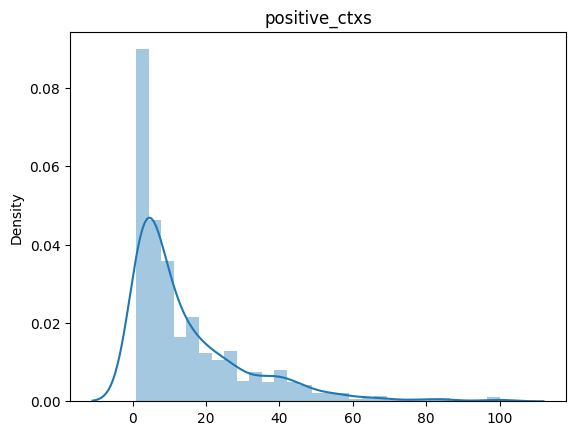

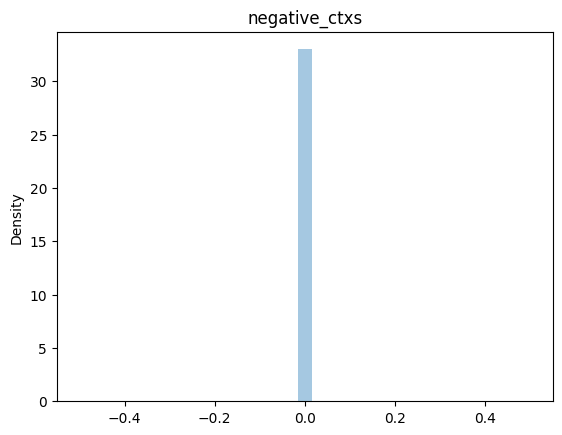

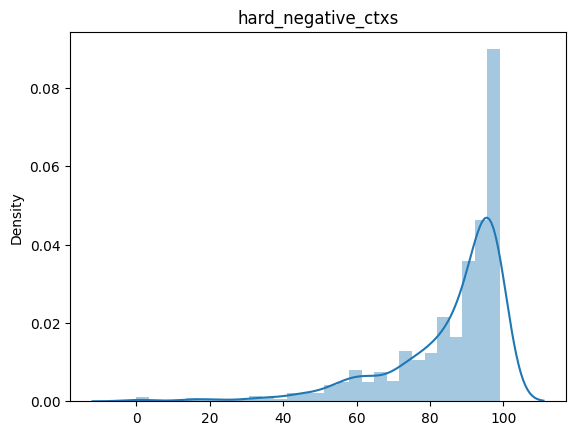

In [42]:
sns.distplot(np.array(poslist)).set(title='positive_ctxs')
plt.show()
sns.distplot(np.array(neglist)).set(title='negative_ctxs')
plt.show()
sns.distplot(np.array(hneglist)).set(title='hard_negative_ctxs')
plt.show()

# Web QA

In [43]:
docs = load_dataset( irdata_list[4] )
print(len(docs))

2474


In [44]:
poslist, neglist, hneglist = stats_data(docs)

**** max ****
pos: 100
neg 0
hard_neg 99
**** min ****
pos 1
neg 0
hard_neg 0
**** mean ****
pos 11.143896523848019
neg 0.0
hard_neg 88.85610347615199
**** median ****
pos 6.0
neg 0.0
hard_neg 94.0


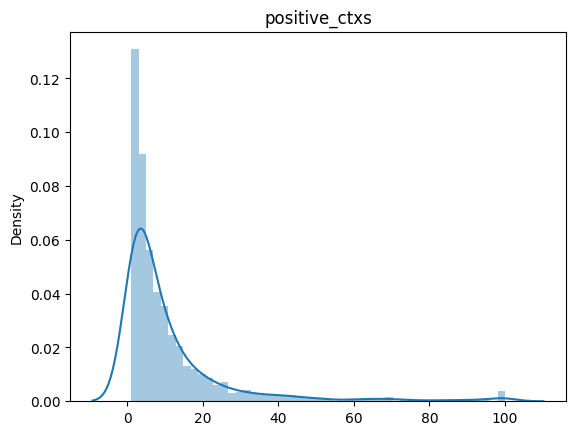

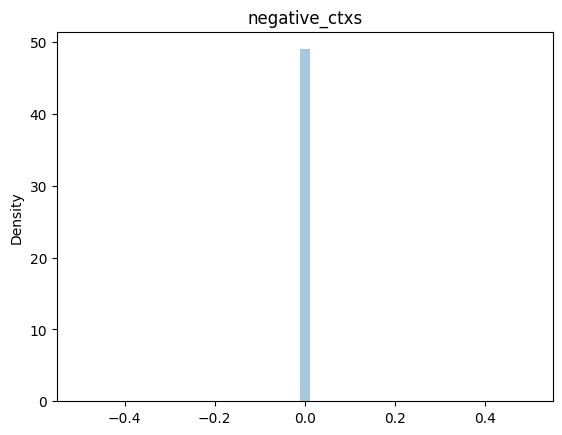

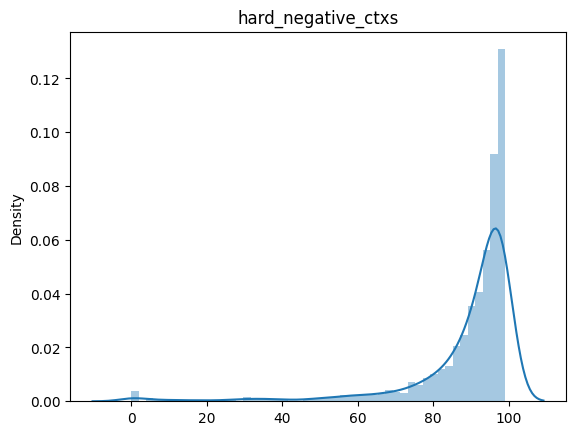

In [45]:
sns.distplot(np.array(poslist)).set(title='positive_ctxs')
plt.show()
sns.distplot(np.array(neglist)).set(title='negative_ctxs')
plt.show()
sns.distplot(np.array(hneglist)).set(title='hard_negative_ctxs')
plt.show()

# SQUAD 1.0

In [46]:
docs = load_dataset( irdata_list[4] )
print(len(docs))

2474


In [47]:
poslist, neglist, hneglist = stats_data(docs)

**** max ****
pos: 100
neg 0
hard_neg 99
**** min ****
pos 1
neg 0
hard_neg 0
**** mean ****
pos 11.143896523848019
neg 0.0
hard_neg 88.85610347615199
**** median ****
pos 6.0
neg 0.0
hard_neg 94.0


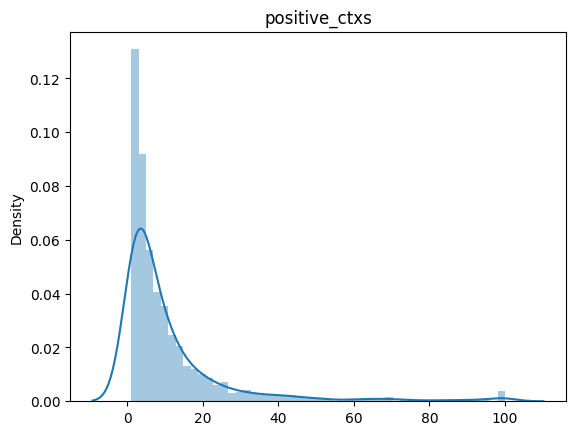

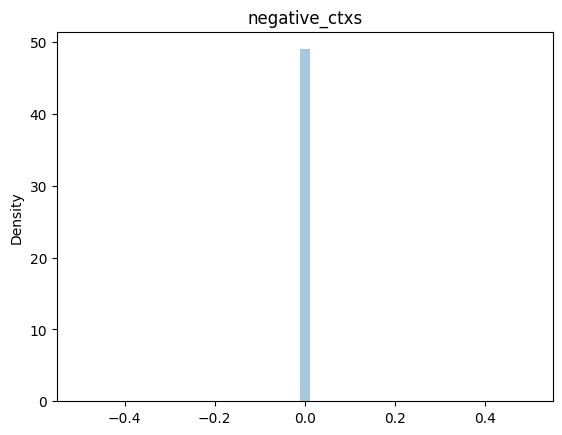

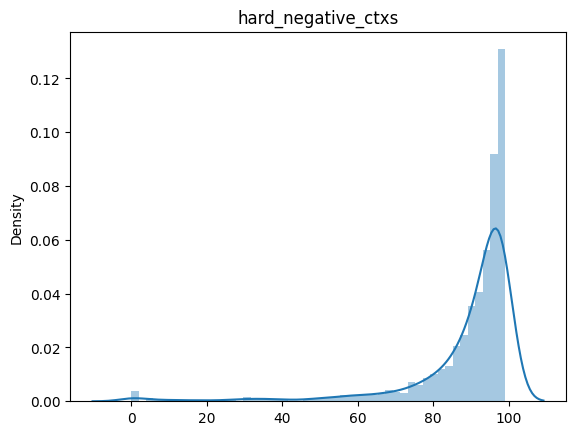

In [48]:
sns.distplot(np.array(poslist)).set(title='positive_ctxs')
plt.show()
sns.distplot(np.array(neglist)).set(title='negative_ctxs')
plt.show()
sns.distplot(np.array(hneglist)).set(title='hard_negative_ctxs')
plt.show()

## 예시 둘러보기

In [19]:
idx = 19

In [20]:
check_doc(docs[idx])
get_datatext(idx, "dataset")

Dataset: /private/home/scottyih/playground/bert-qa/data/triviaqa-train.qa.csv | Q: In which branch of the arts is Patricia Neary famous? | A: ['Ballet', 'Ballet competitions', 'Ballet schools', 'Balet, India', 'Balletti', 'Ballet dancing', '1938 ballet premieres', 'Balletto', 'Balletomane', '2011 ballet premieres', '1940 ballet premieres', 'Balletomanes', '1939 ballet premieres', 'Ballet characters', 'Ballet teachers', 'Ballet dance', 'Classical Dance', 'Ballets', 'Ballet lessons', '1915 ballet premieres', '1914 ballet premieres', 'Classical dance', 'UN/LOCODE:INBLT', '1916 ballet premieres', 'Balet', 'Ballett']
pos:3 neg:0 hard neg:97
'/private/home/scottyih/playground/bert-qa/data/triviaqa-train.qa.csv'


In [21]:
doc_key = doc_keys["q"]
print(docs[idx][doc_key])
doc_key = doc_keys["p"]
print(len(docs[idx][doc_key]))
pprint.pprint(docs[idx][doc_key][0])
print("-"*11)
pprint.pprint(docs[idx][doc_key][-1])
#check_doc(docs[idx])
#(idx, "positive_ctxs")

In which branch of the arts is Patricia Neary famous?
3
{'psg_id': '17887079',
 'score': 24.602943,
 'text': 'Patricia Neary Patricia Neary (born October 27, 1942) is an American '
         'ballerina, choreographer and ballet director, who has been '
         'particularly active in Switzerland. She has also been a highly '
         'successful ambassador for the Balanchine Trust, bringing George '
         "Balanchine's ballets to 60 cities around the globe. Born in Miami, "
         'Florida, she first studied there under George Milenoff and Thomas '
         'Armour until she attended the School of American Ballet in New York. '
         'At the age of 14, she joined the National Ballet of Canada as the '
         'youngest dancer in the company. In 1960, she became a member of the '
         'New York City',
 'title': 'Patricia Neary',
 'title_score': 0}
-----------
{'psg_id': '16181004',
 'score': 13.514724,
 'text': 'Patricia Grayburn Patricia Grayburn, MBE DL has a long involve

## 탐색 노트

#### score 1000은 무엇인가?

위 예시를 보면(nq_train, index 19 문서)  
완전 동일한 title, text 인데 title_score, score가 서로 다름(1, 1000 : 0, 13.82)  
아마 기존 데이터셋 정답인 경우와 아닌 경우로 나뉘는거 같음

**NQ, squad 처럼 정답 passage가 이미 있는 경우 1, 1000으로 스코어 고정시켜둠**

---

문서마다 pos, neg, hard neg 수가 다다름. 배치 생성시 instance를 다른 조합으로 여러개 만드나? 싶음  

* 논문에서는 q-passgae 쌍 하나가 instance 하나. 배치 안에 다른 답을 가지고 in-batch negative sampling을 함.
* q 하나에 여러 ctxs 들은 한번에 같이 쓰는건 아닐거 같고 그때 그떄 한쌍을 만드는게 아닐까? 하는 중

---

neg_ctxs, hard_ctxs, pos_ctxs 고찰
* 딱 정해진건 없음. hard는 0인 경우도 많음. 많으면 99개씩 넣어둠.
* squad, nq_train 만 neg_ctxs를 50개씩 채워둠(나머진 길이 0). 나머진 원래 데이터셋에서 QA 쌍만 제공하기 떄문이라함.
* hard_negative들은 모든 dataset에 들어가 있음. 대략 100개에 가깝게 9x개를 채운 느낌. 샘플마다 0개인 건 껴있지만
* hard_negative score는 다 0이 아님

#### Tokenizer

In [9]:
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
#model = BertModel.from_pretrained("bert-base-uncased")
text = "Replace me by any text you'd like."
print(tokenizer.tokenize(text))
#encoded_input = tokenizer(text, return_tensors='pt')
#output = model(**encoded_input)


['replace', 'me', 'by', 'any', 'text', 'you', "'", 'd', 'like', '.']


In [15]:
text = docs[idx][doc_key][1]["text"]
# whitespace 기준 100
print(len(text.split(" ")))
# sub-word 기준 max len은 256. 코드에 기본값이 그렇게 들어가 있음
print(len(tokenizer.tokenize(text)))

100
132


In [5]:
from transformers import ElectraTokenizer,ElectraModel
tokenizer = ElectraTokenizer.from_pretrained("monologg/koelectra-base-v3-discriminator")
res=tokenizer.tokenize("[CLS] 서울과 충북 괴산에서 '국제청소년포럼'을 여는 곳은 [SEP]")
print(res)
#tokenizer.convert_tokens_to_ids(['[CLS]', '한국어', 'EL', '##EC', '##TRA', '##를', '공유', '##합니다', '.', '[SEP]'])


['[CLS]', '서울', '##과', '충북', '괴산', '##에', '##서', "'", '국제', '##청', '##소년', '##포', '##럼', "'", '을', '여', '##는', '곳', '##은', '[SEP]']


In [4]:
model = ElectraModel.from_pretrained("monologg/koelectra-base-v3-discriminator")

Some weights of the model checkpoint at monologg/koelectra-base-v3-discriminator were not used when initializing ElectraModel: ['discriminator_predictions.dense.weight', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [18]:
text = docs[idx][doc_key][1]["text"]
# whitespace 기준 100
#print(len(text.split(" ")))
# sub-word 기준 max len은 256. 코드에 기본값이 그렇게 들어가 있음
print(len(tokenizer.tokenize(text)))

241


In [71]:
l = []
print(l[0:10])

[]


#### 학습 실행 command

* zsh 버전  
```python train_dense_encoder.py --train_datasets=\[nq_train\] dev_datasets=\[nq_dev\] train=biencoder_local```